In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

In [40]:
#Uses the latin1 encoding, which helps avoid UnicodeDecodeError when your data contains special European characters.

df = pd.read_csv(r'Downloads/E commerce Data/data.csv',encoding='latin1')

In [48]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00,United Kingdom


In [50]:
#Using errors='coerce' ensures that the conversion won't fail and 
#lets you easily spot problematic entries (they become NaT).

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],errors='coerce')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [69]:
df.duplicated().sum()

0

In [65]:
df.drop_duplicates(inplace=True)

In [71]:
df = df.dropna(subset=['CustomerID'])

In [105]:
# Right way of changing the datatype of a column in pandas, especially when you want to avoid the SettingWithCopyWarning.

df.loc[:,'CustomerID'] = df['CustomerID'].astype('int64')

In [103]:
df.loc[:,'Total Price'] = df['UnitPrice']*df['Quantity']

In [111]:
df = df[df['Quantity']>0]

In [115]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
count,392732.00,392732,392732.00,392732.00,392732.00
mean,13.15,2011-07-10 19:15:24.576301568,3.13,15287.73,22.63
min,1.00,2010-12-01 08:26:00,0.00,12346.00,0.00
25%,2.00,2011-04-07 11:12:00,1.25,13955.00,4.95
50%,6.00,2011-07-31 12:02:00,1.95,15150.00,12.39
75%,12.00,2011-10-20 12:53:00,3.75,16791.00,19.80
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00,168469.60
std,181.59,NaN,22.24,1713.57,311.08


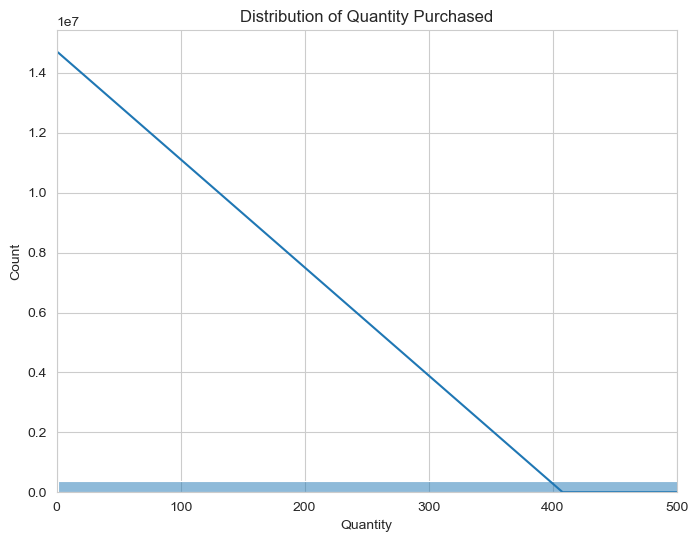

In [143]:
#Quantity Distribution

plt.figure(figsize=(8,6))
sns.histplot(df['Quantity'],bins = 50 , kde = True)
plt.xlim(0,500)
plt.title('Distribution of Quantity Purchased')
plt.show()

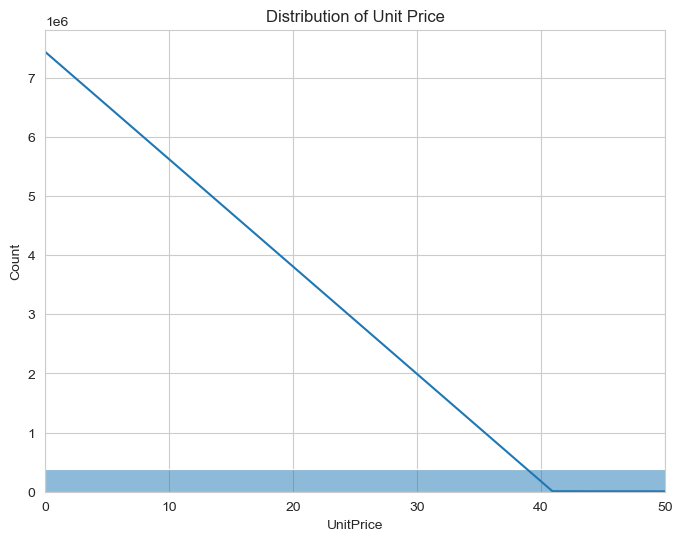

In [133]:
#Price distribution

plt.figure(figsize=(8,6))
sns.histplot(df['UnitPrice'],bins = 50 , kde = True)
plt.xlim(0,50)
plt.title('Distribution of Unit Price')
plt.show()

### Top Products and Sales Pattern

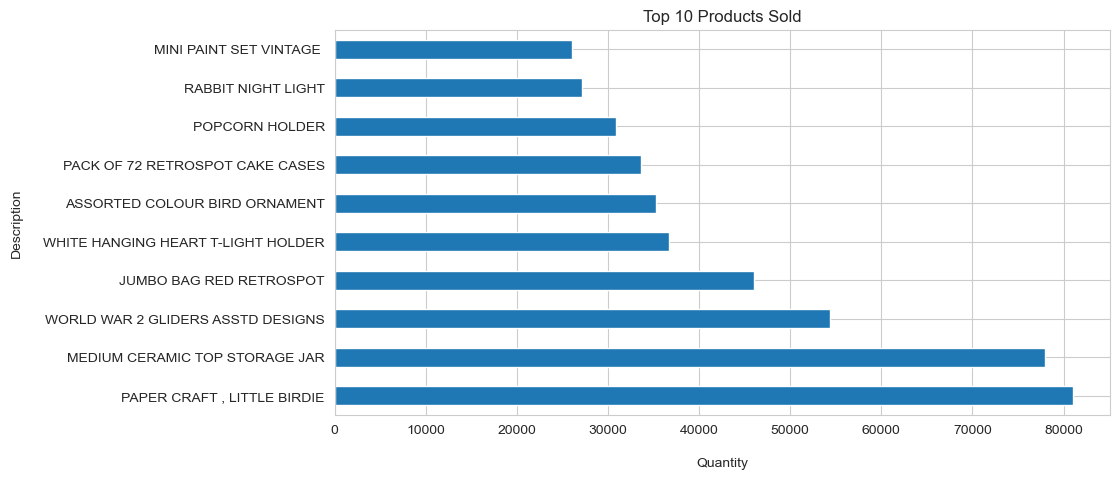

In [189]:
# Top 10 Products Sold

top_10_Products = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
top_10_Products.plot(kind='barh',title = 'Top 10 Products Sold',figsize=(10,5))
plt.xlabel('Quantity',labelpad = 15)
plt.ylabel('Description',labelpad = 15)
plt.show()

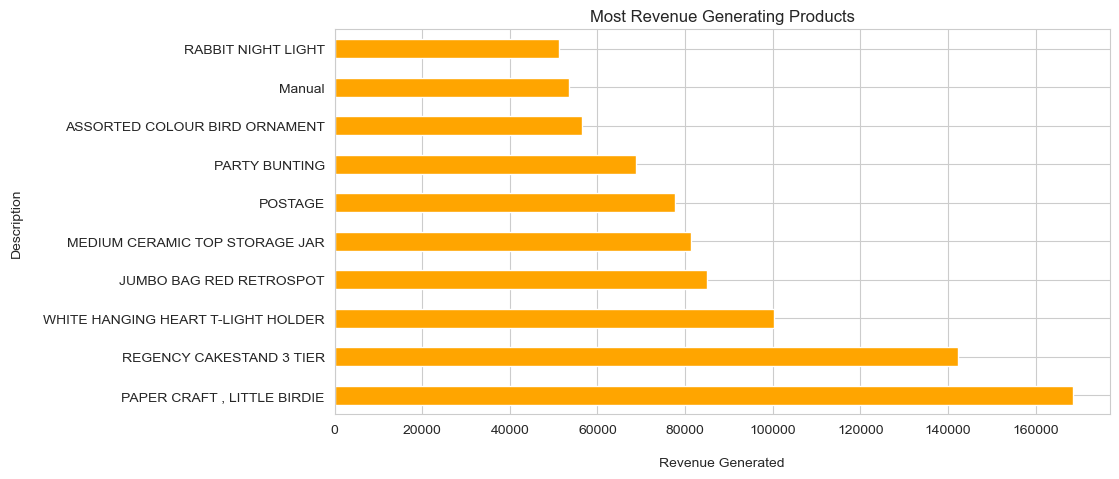

In [191]:
# Most Revenue Generating Products

top_10_Revenue = df.groupby('Description')['Total Price'].sum().sort_values(ascending=False).head(10)
top_10_Revenue.plot(kind='barh',color='orange',title = 'Most Revenue Generating Products',figsize = (10,5))
plt.xlabel('Revenue Generated',labelpad=15)
plt.ylabel('Description',labelpad=15)
plt.show()

###  Hourly & Weekly Purchase Behavior

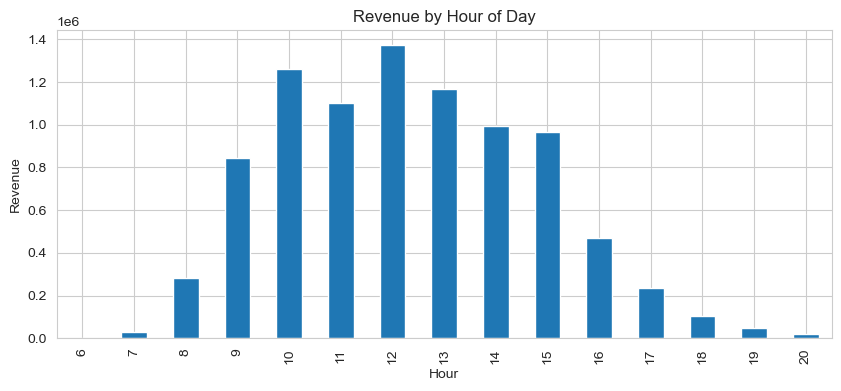

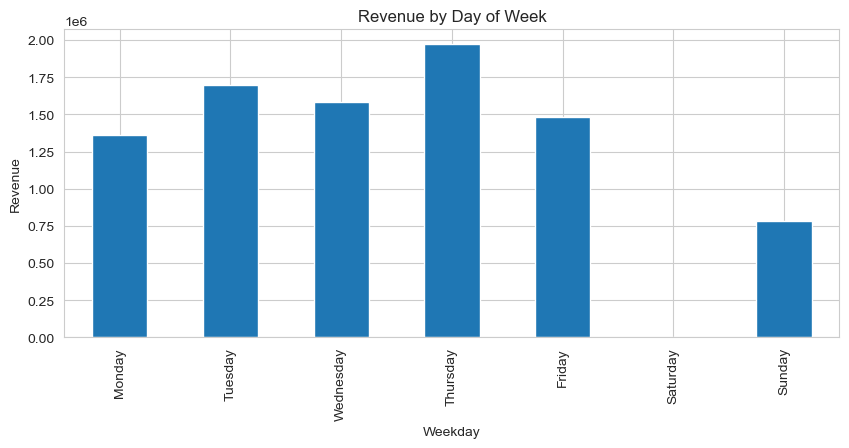

In [280]:

df.loc[:,'Hour'] = df['InvoiceDate'].dt.hour
df.loc[:,'Weekday'] = df['InvoiceDate'].dt.day_name()

# Sales by hour
df.groupby('Hour')['Total Price'].sum().plot(kind='bar', figsize=(10, 4), title='Revenue by Hour of Day')
plt.ylabel('Revenue')
plt.show()

# Sales by weekday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('Weekday')['Total Price'].sum().reindex(order).plot(kind='bar', figsize=(10, 4), title='Revenue by Day of Week')
plt.ylabel('Revenue')
plt.show()


### Average spend by UK and other countries

In [259]:

uk = df[df['Country']=='United Kingdom']['Total Price']
non_uk = df[df['Country']!='United Kingdom']['Total Price']

t_stat,p_val = stats.ttest_ind(uk,non_uk,equal_var = False)
print(f'T-Statistic : {t_stat : .2f}, P-Value : {p_val : .4f}')

alpha = 0.05

if p_val < alpha:
    print('There are statistically significant differences found in UK and Non UK Average Spends. So we reject the Null Hypothesis')
elif p_val >= alpha:
    print('There is no statistical differences on Average Spends on UK and Non UK users. So we fail to reject the Null Hypothesis')

T-Statistic : -22.95, P-Value :  0.0000
There are statistically significant differences found in UK and Non UK Average Spends. So we reject the Null Hypothesis


### Correlation Analysis: Unit Price vs. Quantity

In [255]:
# To check higher oriced items sell more or less

correlation = df['UnitPrice'].corr(df['Quantity'])
print(f'Correlation between Unit price and Quantity : {correlation:.2f}')

if correlation > 0:
    print('Higher priced items tend to sell more in quantity')
elif correlation < 0:
    print('Higher priced items tend to sell less in quantity')
else:
    print('There is no linear relationship between Quantity and Unit Price')

Correlation between Unit price and Quantity : -0.00
Higher priced items tend to sell less in quantity


### Are returns equally distributed across countries?

In [269]:
from scipy.stats import chi2_contingency

df.loc[:,'is_return'] = df['Quantity'] < 0

contingency = pd.crosstab(df['Country'],df['is_return'])

chi2,p,dof,ex = chi2_contingency(contingency)
print(f'Chi Square Statistic : {chi2:.2f},P-Value : {p:.4f}')

alpha = 0.05

if p < alpha:
    print('Return Behaviour significantly varies across countries')
else:
    print('No significant difference in return behaviour across countries')

Chi Square Statistic : 0.00,P-Value : 1.0000
No significant difference in return behaviour across countries
